In [23]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image
     

(X_train, y_train), (X_test, y_test) =  mnist.load_data()
     

11490434/11490434 [==============================] - 0s 0us/step


In [24]:
X_train.shape
     



(60000, 28, 28)

In [25]:
X_test.shape
     

(10000, 28, 28)

In [26]:


single_image= X_train[0]
     

In [27]:
single_image.shape
     

(28, 28)

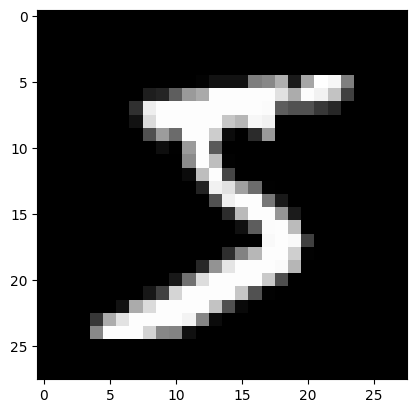

In [28]:


plt.imshow(single_image,cmap='gray')
     

In [29]:


y_train.shape
     

(60000,)

In [30]:


X_train.min()
     

0

In [31]:


X_train.max()
     

255

In [32]:


X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
     

In [33]:


X_train_scaled.min()
     

X_train_scaled.max()
     

1.0

In [34]:


y_train[0]
     


5

In [35]:

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)
     


In [36]:

type(y_train_onehot)

numpy.ndarray

In [37]:

     

y_train_onehot.shape
     


(60000, 10)

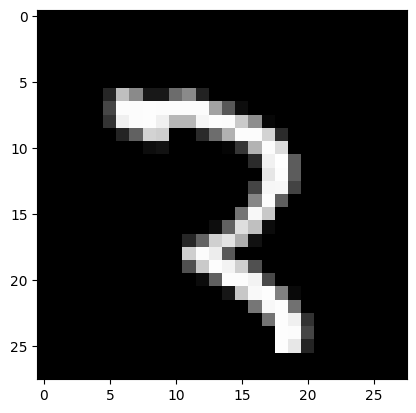

In [38]:

single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
     


In [39]:

y_train_onehot[500]
     



array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [40]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)
     

In [41]:
model = keras.Sequential()
model.add(layers.Input (shape= (28,28, 1))) 
model.add(layers.Conv2D(filters=28,kernel_size= (3,3) ,activation='relu' )) 
model.add(layers.MaxPool2D(pool_size= (2,2))) 
model.add (layers.Flatten())
model.add(layers.Dense(32,activation='relu' ))
model.add(layers.Dense(10, activation='softmax'))

In [42]:


model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                151456    
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 152,066
Trainable params: 152,066
Non-trainable params: 0
________________________________________________

In [43]:


# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')
     

In [44]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=32, 
          validation_data=(X_test_scaled,y_test_onehot))
     

Epoch 1/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2038 - accuracy: 0.9417 - val_loss: 0.0767 - val_accuracy: 0.9770
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0688 - accuracy: 0.9798 - val_loss: 0.0573 - val_accuracy: 0.9815
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0478 - val_accuracy: 0.9837
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0378 - accuracy: 0.9879 - val_loss: 0.0480 - val_accuracy: 0.9838
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0464 - val_accuracy: 0.9839


In [45]:


metrics = pd.DataFrame(model.history.history)
     


In [46]:

metrics.head()
     

,loss,accuracy,val_loss,val_accuracy
0,0.203774,0.941683,0.076682,0.9770
1,0.068788,0.979767,0.057335,0.9815
2,0.049817,0.984450,0.047770,0.9837
3,0.037847,0.987900,0.048016,0.9838
4,0.029665,0.990567,0.046419,0.9839


<Axes: >

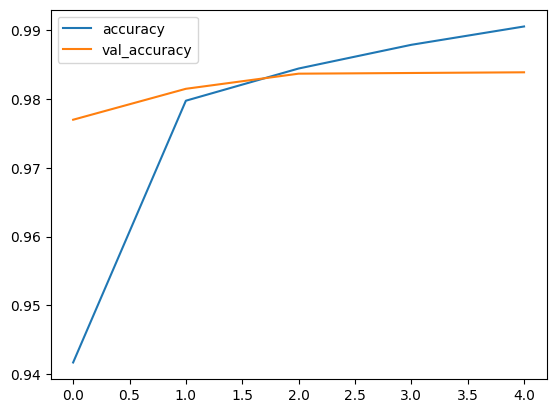

In [47]:


metrics[['accuracy','val_accuracy']].plot()
     

<Axes: >

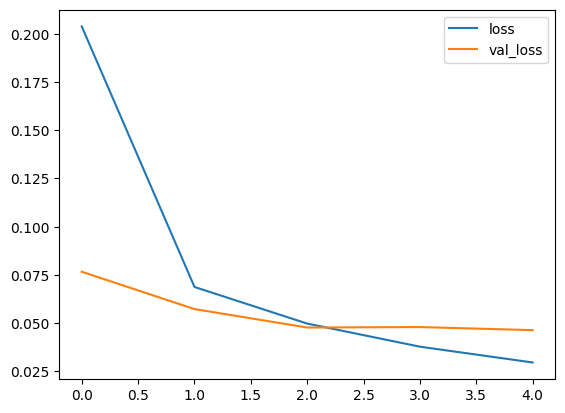

In [48]:


metrics[['loss','val_loss']].plot()
     

In [49]:


x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
     

     


313/313 [==============================] - 2s 6ms/step


In [50]:

print(confusion_matrix(y_test,x_test_predictions))

[[ 974    0    2    1    0    0    1    0    2    0]
 [   0 1121    2    2    1    1    5    1    2    0]
 [   2    2 1013    4    2    0    1    5    2    1]
 [   0    0    1  998    0    5    0    2    4    0]
 [   0    0    0    0  965    0    3    1    4    9]
 [   1    0    1    3    0  885    1    0    1    0]
 [   5    1    0    0    2    3  947    0    0    0]
 [   0    2   10    1    0    0    0  998    3   14]
 [   2    0    6    3    0    1    0    2  954    6]
 [   5    2    0    5    5    5    0    1    2  984]]


In [51]:

print(classification_report(y_test,x_test_predictions))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [53]:


img = image.load_img('one.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

     


In [54]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)
     


1/1 [==============================] - 0s 29ms/step


In [55]:

print(x_single_prediction)
     

[8]


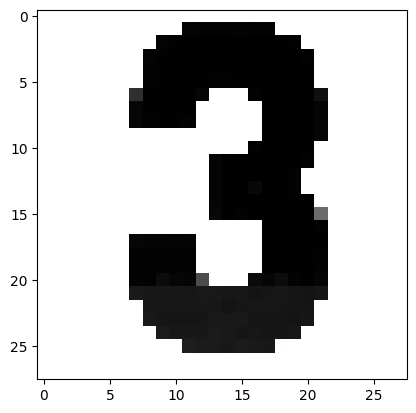

In [56]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')    

In [57]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [58]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 24ms/step


In [59]:
print(x_single_prediction)

[3]
